pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html
event=  Login_in_Quiz values= []
event=  Login values= {'name1': 'raghav', 'email1': 'raghav@gmail.com', 'password1': '1234'}
WelcomeRaghav
29
event=  Lock_Answer values= {'Radio1': False, 'Radio2': False, 'Radio3': True, 'Radio4': False}
Your Answer is Wrong
Correct Answer
Jhinga
Jhang  (Punjabi and Urdu: جھنگ‎) is the capital city of Jhang District, in the central portion of the province of Punjab, Pakistan. It is situated on the east bank of the Chenab river.  According to the 2017 Census of Pakistan, it had a population of 414,131. It is the 18th Largest city of Pakistan. It is known for the shrine of Sultan Bahoo and Heer and Ranjha's Tomb.
24
event=  Lock_Answer values= {'Radio1': False, 'Radio2': False, 'Radio3': True, 'Radio4': False}
Your Answer is correct
Correct Answer
Walmart
Walmart Inc. ( ; formerly Wal-Mart Stores, Inc.) is an American multinational retail corporation that operates a cha

C:\Users\Hp\Anaconda3\lib\site-packages\wikipedia\wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file C:\Users\Hp\Anaconda3\lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


No Page Found on WIKIPEDIA
1
event=  Lock_Answer values= {'Radio1': False, 'Radio2': False, 'Radio3': True, 'Radio4': False}
Your Answer is correct
Correct Answer
Zahir Delhvi
No Page Found on WIKIPEDIA
13
event=  Lock_Answer values= {'Radio1': False, 'Radio2': False, 'Radio3': True, 'Radio4': False}
Your Answer is correct
Correct Answer
Hichki
Hichki (transl. Hiccup) is a 2018 Indian Hindi comedy-drama film, directed by Sidharth P. Malhotra and produced by Maneesh Sharma under the banner Yash Raj Films. It is an Indian adaptation of Brad Cohen's autobiography Front of the Class: How Tourette Syndrome Made Me the Teacher I Never Had, which Yash Raj Films acquired the rights to, with Cohen himself also giving advice during the film's production.Hichki stars Rani Mukerji in the lead role of an aspiring teacher having Tourette syndrome, who must prove herself by educating a group of underprivileged students. The film's trailer was launched on December 19, 2017, And Rani Mukerji received h

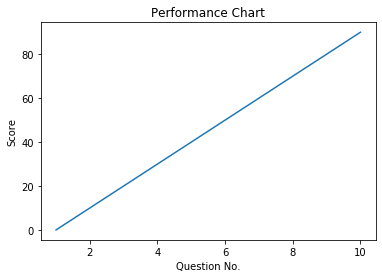

In [1]:
import PySimpleGUI as sg
import pandas as pd
import numpy as np
import wikipedia
import pyttsx3
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import time
import pygame

#from docx import Document
#from docx.shared import Inches
#import sys 
#import requests as r
#import webbrowser as wb
#import bs4 

%matplotlib inline

######################################CONNECTION WITH SQL DATABASE#####################################################
df=pd.read_excel("Quiz_Qestion.xlsx")
#print(df)

conn = sqlite3.connect('Users.db')
c = conn.cursor()

c.execute("""CREATE TABLE IF NOT EXISTS user (
            Username VARCHAR(20) NOT NULL,
            First_Name VARCHAR(20) NOT NULL,
            Last_Name VARCHAR(20) NOT NULL,
            Email VARCHAR(20) NOT NULL,
            Password VARCHAR(20) NOT NULL
            )""")
conn.commit()


########################################CODE FOR SPEAK RESULTS#########################################################  
engine=pyttsx3.init("sapi5")
voices=engine.getProperty("voices")
#print(voices[1].id)
engine.setProperty("voice",voices[0].id)



def speak(audio):
    engine.say(audio)
    engine.runAndWait()
#####################################FUNCTION FOR ADDIND NEW USER######################################################
def new_user():
    with conn:
        insert=('INSERT INTO user VALUES (?,?,?,?,?)')
        c.execute(insert,[values["name"],values["first_name"],values["last_name"],values["email"],values["password"]])
        conn.commit()
        r=c.fetchall()
        if r:
            for i in r:
                print("Welcome"+i[1]+"you have registered")
                window1.Close()
                break
####################################FUNCTION FOR LOGIN USER############################################################
def login():
    with conn:
        find_user=("SELECT * FROM User WHERE Username=? AND Email=? AND Password=?")
        c.execute(find_user,([(name),(email),(password)]))
        results=c.fetchall()
                
        if results:
            for i in results:
                print("Welcome"+i[1])
                break
        else:
            print("Username and password not recognised")
            again=input("Do you want to try again?y/n ")
            if again.lower()=="n":
                print("Goodbye")
                #speak("Goodbye")
                time.sleep(.1)
            elif again.lower()=="y":
                print("Please enter username and password ")
                time.sleep(.1)
            window2.Close()
###################CODE FOR SELECTING REGISTRATION WINDOW OR LOGIN WINDOW#############################################

layout=[
    [sg.Text("Please Select Appropriate Option For Start Quiz",size=(30,7),font="Helvetica 15")],
    [sg.Button("Register_for_Quiz"), sg.Button("Login_in_Quiz")]
]
window= sg.Window('SELECTING_REGISTRATION_WINDOW_OR_LOGIN_WINDOW').Layout(layout)
while True:
    event,values=window.Read()
    print("event= ", event,"values=",values)
    
###########################################CODE FOR REGISTRATION WINDOW################################################
    if(event=="Register_for_Quiz"):
        window.Close()
        layout1=[
                [sg.Text("User Registration",size=(20,3),font="Courier 15")],
                [sg.Text('User Name', size=(15, 1)), sg.InputText('',key="name")],
                [sg.Text('First_Name', size=(15, 1)), sg.InputText('',key="first_name")],
                [sg.Text('Last_Name', size=(15, 1)), sg.InputText('',key="last_name")],
                [sg.Text('Email', size=(15, 1)), sg.InputText('',key="email")],
                [sg.Text('Password', size=(15, 1)), sg.InputText('',key="password")],
                [sg.Button("Submit"), sg.Button("Exit")]
        ]

        window1= sg.Window('Registration_For_Quiz_Application').Layout(layout1)
        #speak("You had click on Register_for_Quiz Button to Register, Now enter User Name,First_Name,Last_Name,Email,Password")

        while True:
            event,values=window1.Read()
            print("event= ", event,"values=",values)
            if(event=="Submit"):
                new_user()        
            elif(event is None or event=="Exit"):
                window1.Close()
                break 
            break    
    ####################################CODE FOR LOGIN WINDOW##############################################################
    elif(event=="Login_in_Quiz"):
        window.Close()
        layout2=[
                [sg.Text("User Login",size=(15,3),font="Courier 15")],
                [sg.Text('User Name', size=(15, 1)), sg.InputText('',key="name1")],
                [sg.Text('Email', size=(15, 1)), sg.InputText('',key="email1")],
                [sg.Text('Password', size=(15, 1)), sg.InputText('',key="password1")],
                [sg.Button("Login"), sg.Button("Exit")]
        ]

        window2= sg.Window('Login_For_Quiz_Application').Layout(layout2)
        #speak("You had click on Login_in_Quiz Button to Login, Now enter User Name,Email,Password")
        while True:
            event2,values2=window2.Read()
            print("event= ", event2,"values=",values2)
            #Start_window.Close()
            name=values2["name1"]
            email=values2["email1"]
            password=values2["password1"]
            if(event2=="Login"):
                login()                
            elif(event is None or event=="Exit"):
                window2.Close()
                break
            break
        break  


########################################CODE FOR TIMER SOUND###########################################################    
def Sound():
    pygame.mixer.init()
    pygame.mixer.music.load("tictiksound.mp3")
    pygame.mixer.music.play()
########################################CODE FOR TIMER SOUND###########################################################
def Alarm():
    pygame.mixer.init()
    pygame.mixer.music.load("LoudAlarm.mp3")
    pygame.mixer.music.play()
#########################################CODE FOR TIMER################################################################    
"""def timer():
    hr=0
    min=0
    sec=30
    for i in range(0,sec+1):
        global t
        t=str(hr).zfill(2)+":"+str(min).zfill(2)+":"+str(sec-i).zfill(2)
        #print(t)
        Sound()
        time.sleep(1)
    print("Time is up")
    Alarm()"""
########################################CODE FOR GENERATION OF QUIZ####################################################       
    
list=[]
l1=[]     
list_Y=[]    
Score=0    
for i in range(10):
    r=np.random.randint(0,30)
    print(r)
    layout4=[
        [sg.Text(str(df.iloc[r,1]),key="Question")],
        [sg.Radio(str(df.iloc[r,2]),"Radio",key="Radio1")],
        [sg.Radio(str(df.iloc[r,3]),"Radio",key="Radio2")],
        [sg.Radio(str(df.iloc[r,4]),"Radio",key="Radio3")],
        [sg.Radio(str(df.iloc[r,5]),"Radio",key="Radio4")],
        [sg.Text('', size=(15, 2),font=('Helvetica', 20), justification='center', key="_timer")],
        [sg.Button("Next"),sg.Button("Lock_Answer"),sg.Button("Quit")]
    ]
    window4= sg.Window('Quiz_Application').Layout(layout4)
    while True:
        event,values=window4.Read()
        l=values
        
        #window4.FindElement("_timer").Update(t)
        #timer()
        #window4.FindElement("timer_sound").Update(f)
        print("event= ", event,"values=",values)
        break
    if(event is None or event=="Quit"):
        break
    elif(event=="Lock_Answer"):
        if(l["Radio1"]==True):
            l1.append([df.iloc[r,1],df.iloc[r,2],df.iloc[r,6]])
            list.append(l1)
            l1=[]
            if(df.iloc[r,2]==df.iloc[r,6]):
                print("Your Answer is correct")
                Score+=10
                list_Y.append(Score)
                window4.Close()
            else:
                print("Your Answer is Wrong")
                list_Y.append(0)
                window4.Close()
    
        elif(l["Radio2"]==True):
            l1.append([df.iloc[r,1],df.iloc[r,3],df.iloc[r,6]])
            list.append(l1)
            l1=[]
            if(df.iloc[r,3]==df.iloc[r,6]):
                print("Your Answer is correct")
                Score+=10
                list_Y.append(Score)
                window4.Close()
            else:
                print("Your Answer is Wrong")
                list_Y.append(0)
                window4.Close()
    
        elif(l["Radio3"]==True):
            l1.append([df.iloc[r,1],df.iloc[r,4],df.iloc[r,6]])
            list.append(l1)
            l1=[]
            if(df.iloc[r,4]==df.iloc[r,6]):
                print("Your Answer is correct")
                Score+=10
                list_Y.append(Score)
                window4.Close()
            else:
                print("Your Answer is Wrong")
                list_Y.append(0)
                window4.Close()
                
        elif(l["Radio4"]==True):
            l1.append([df.iloc[r,1],df.iloc[r,5],df.iloc[r,6]])
            list.append(l1)
            l1=[]
            if(df.iloc[r,5]==df.iloc[r,6]):
                print("Your Answer is correct")
                Score+=10
                list_Y.append(Score)
                window4.Close()
            else:
                print("Your Answer is Wrong")
                list_Y.append(0)
                window4.Close()
        else:
            #print("Your Answer is Wrong")
            print("Correct Answer")
            print(str(df.iloc[r,6]))
        try:
            print("Correct Answer")
            print(str(df.iloc[r,6]))
            summary2=wikipedia.summary(str(df.iloc[r,6]),sentences=5)
            print(summary2)
            #speak(summary2)
        except:
            print("No Page Found on WIKIPEDIA")
            #speak("No Page Found on WIKIPEDIA")
            #summary=wikipedia.summary(str(df.iloc[r,1]),sentences=5)
            #print(str(df.iloc[r,1]))
            #print(summary)
            #speak(summary)    
        
    elif(event=="Next"):
        continue

        
#########################################CODE FOR SUBMIT WINDOW########################################################
x=np.arange(1,11,1)
print(x)
layout5=[
    [sg.Button("Submit")]
]
window5 = sg.Window('Quiz_Application_Submit').Layout(layout5)
event,values=window5.Read()
print("event= ", event,"values=",values)
if(event=="Submit"):
    print("Score=",Score)
    x=np.arange(1,11,1)
    y=list_Y
    print(y)
    plt.title("Performance Chart")
    plt.xlabel("Question No.")
    plt.ylabel("Score")
    plt.plot(x,y)
    plt.savefig("Figure.png")
    plt.show()
    
window5.Close()        
    

        
   # print(x)    
#print(list_Y) 


In [2]:
import time
time=time.time()
print(time)
days=time//(24*3600)
time=time%(24*3600)
hour=int(time//3600)
time=time%3600
minutes=int(time//60)
time=time//60
seconds=int(time)
current_time=str(hour)+":"+str(minutes)+":"+str(seconds)
print(current_time)


1577778624.6167219
7:50:50


In [11]:
from PIL import Image
im= Image.open("Figure.png")
out=im.transpose(Image.FLIP_LEFT_RIGHT)
ino=out.transpose(Image.FLIP_TOP_BOTTOM)
ino=ino.transpose(Image.FLIP_LEFT_RIGHT)
ino.save("Fig1.png")
ino.show()

In [12]:
from reportlab.pdfgen import canvas
from reportlab.platypus import SimpleDocTemplate
from reportlab.lib import pdfencrypt
from reportlab.lib.units import inch
from reportlab.platypus.tables import Table, TableStyle 
from reportlab.lib.pagesizes import letter

from reportlab.lib import colors 
#from reportlab.lib.enums import TA_LEFT, TA_CENTER, TA_RIGHT
import datetime
enc=pdfencrypt.StandardEncryption("1234",canPrint=1)
pdf=canvas.Canvas("Project_demo.pdf",bottomup=0,encrypt=enc)
pdf.translate(inch,inch)
fonts=pdf.getAvailableFonts()
print(fonts)
################## Heading #############################################################################################
pdf.setFont("Courier-BoldOblique",40)
pdf.setFillColor("orange")
pdf.drawCentredString(250,50,"Report For Quiz")
################# Username,EmailId,Date,Time ###########################################################################
pdf.setFont("Courier-Bold",20)
pdf.setFillColor("cyan")
pdf.drawString(0,100,"Username:"+values2["name1"])
pdf.setFillColor("cornflower")
pdf.drawString(0,130,"Email_ID:"+values2["email1"])
pdf.setFillColor("thistle")
pdf.drawString(330,100,"Date:"+str(datetime.date.today()))
pdf.setFillColor("cadetblue")
pdf.drawString(330,130,"Time:"+str(current_time))



pdf.drawImage("Fig1.png",100,160,300,350)
pdf.save()

['Courier', 'Courier-Bold', 'Courier-BoldOblique', 'Courier-Oblique', 'Helvetica', 'Helvetica-Bold', 'Helvetica-BoldOblique', 'Helvetica-Oblique', 'Symbol', 'Times-Bold', 'Times-BoldItalic', 'Times-Italic', 'Times-Roman', 'ZapfDingbats']
